**This is the idea notebook for the final project**

In [445]:
%matplotlib inline
import numpy 
from matplotlib import pyplot
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [620]:
theta = [0,3.75,7.5,11.25,15,20,25,30,35,40,45,50,60,75,90,105,120,130,135,140,145,150,155,160,165,168.75,172.5,176.25,180,183.75,187.5,191.25,195,200,205,210,215,220,225,230,240,255,270,285,300,310,315,320,325,330,335,340,345,348.75,352.5,356.25,360]
torque_wind = [16,5,13,-26,-31,-31,-26,-13,-5,0,5,10,21,50,10,-49,-21,-10,-5,0,5,13,26,31,31,26,-13,-5,16,5,13,-26,-31,-31,-26,-13,-5,0,5,10,21,50,10,-49,-21,-10,-5,0,5,13,26,31,31,26,-13,-5,16]

maxwindspeed = 155 #mph

newtorque_wind = []
for x in torque_wind:
    newtorque_wind.append(x/((1.1508*155)**2)*(1.1508*maxwindspeed)**2)


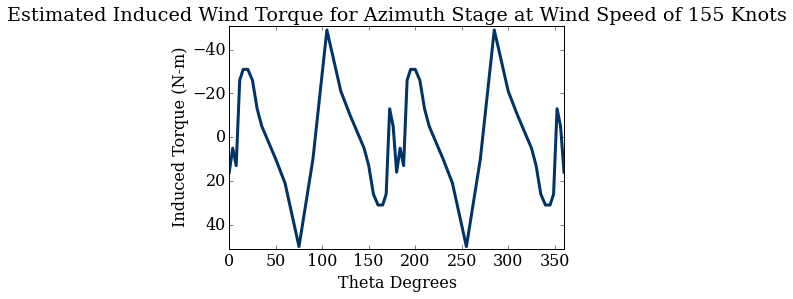

In [621]:
pyplot.plot(theta, newtorque_wind, color='#003366', ls='-', lw=3)
pyplot.title('Estimated Induced Wind Torque for Azimuth Stage at Wind Speed of 155 Knots')
pyplot.ylabel('Induced Torque (N-m)')
pyplot.xlabel('Theta Degrees')
pyplot.xlim(0,360);
pyplot.ylim(51,-51);

**Please let me know your thoughts if this is an acceptable MAE 6286 Design Project**

The cells below are just notes at the moment for comparison if the input was a demand acceleration profile and the unknown was the current. In the below case the solution for curernt I(t) would be a polynomial equation.

In [622]:
acc = 50
vel = 50
dt=1000
j=dt+1
timemax = 1+(360-2*acc/2)/vel+1
time = numpy.linspace(0,timemax,timemax*dt+1)

aprofile = numpy.zeros(len(time))
aprofile[:j]=acc
aprofile[-j:]=-acc
vprofile = numpy.zeros(len(time))
vprofile[:] = vel
vprofile[:j]=acc*time[:j]
vprofile[-j:]=-acc*(time[-j:]-time[-j])+vel
thetaprofile = aprofile*time**2//2
thetaprofile[j:]=vprofile[j:]*(time[j:]-.5)
thetaprofile[-j:]=aprofile[-j:]*(time[-j:]-time[-j])**2/2+vel*(time[-j:]-.5)

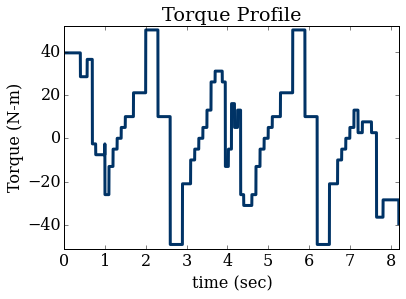

In [623]:
 len(theta)
x=thetaprofile.copy()
inertia = 26.831
vibtorque = 0
frictorque = 0
for i in range(0,len(theta)):
    for b in range(0,len(thetaprofile)-1):
        if thetaprofile[b]>=theta[i] and thetaprofile[b]<theta[i+1]:
            x[b]=inertia*aprofile[b]*numpy.pi/180+newtorque_wind[i]
x[-1]=-x[0]            
x[:]=x[:]+vibtorque+frictorque
        
pyplot.plot(time, x, color='#003366', ls='-', lw=3)
pyplot.title('Torque Profile')
pyplot.ylabel('Torque (N-m)')
pyplot.xlabel('time (sec)')
pyplot.xlim(0,timemax);
pyplot.ylim(numpy.amin(x)-2,numpy.amax(x)+2);

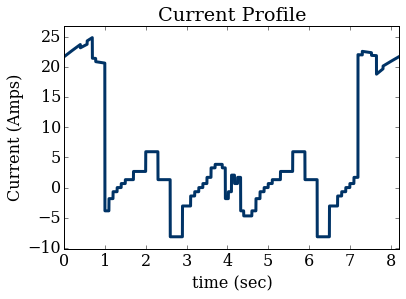

In [632]:
watt = 70
current = x.copy()
current = ((x*vprofile*numpy.pi/180+watt)/.148)**.5
current[1000:-1001]=current[1000:-1001]-(watt/.148)**.5

pyplot.plot(time, current, color='#003366', ls='-', lw=3)
pyplot.title('Current Profile')
pyplot.ylabel('Current (Amps)')
pyplot.xlabel('time (sec)')
pyplot.xlim(0,timemax);
pyplot.ylim(numpy.amin(current)-2,numpy.amax(current)+2);

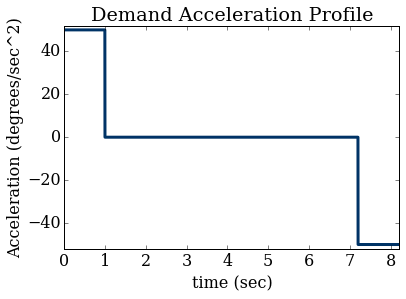

In [625]:
pyplot.plot(time, aprofile, color='#003366', ls='-', lw=3)
pyplot.title('Demand Acceleration Profile')
pyplot.ylabel('Acceleration (degrees/sec^2)')
pyplot.xlabel('time (sec)')
pyplot.xlim(0,timemax);
pyplot.ylim(-acc-2,acc+2);

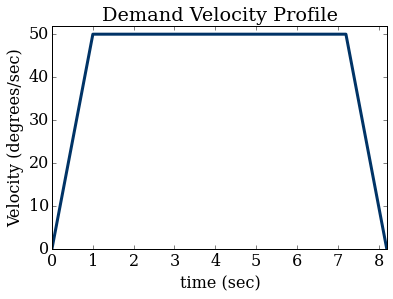

In [587]:
pyplot.plot(time, vprofile, color='#003366', ls='-', lw=3)
pyplot.title('Demand Velocity Profile')
pyplot.ylabel('Velocity (degrees/sec)')
pyplot.xlabel('time (sec)')
pyplot.xlim(0,timemax);
pyplot.ylim(0,vel+2);

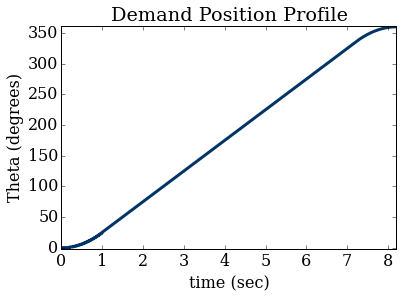

In [588]:
pyplot.plot(time, thetaprofile, color='#003366', ls='-', lw=3)
pyplot.title('Demand Position Profile')
pyplot.ylabel('Theta (degrees)')
pyplot.xlabel('time (sec)')
pyplot.xlim(0,timemax);
pyplot.ylim(0-2,360+2);